## Data Preprocessing Techniques

In [840]:
# load Scikit-lean's downsanpled iris dataset

from sklearn import datasets
iris_dataset = datasets.load_iris()


In [842]:
# Explore the dataset

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [844]:
print(iris_dataset.data.shape)

(150, 4)


In [846]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [848]:
print(iris_dataset.target.shape)

(150,)


In [850]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


## Obtaining an Overview of the Data

### Loading the dataset

In [854]:
import numpy as np
import pandas as pd


# Load the contents of the file into a pandas dataframe
input_file = r"C:\Users\A.W\Downloads\awsmlbook-chapter2-master\awsmlbook-chapter2-master\datasets\titanic_dataset\original\train.csv"

# Remove hidden Unicode characters
#input_file = input_file.encode('utf-8').decode('utf-8')

# input_file = input_file.strip()

df_titanic = pd.read_csv(input_file)

#### Fixed the unicode character problem

In [857]:
import numpy as np
import pandas as pd
from pathlib import Path

# Correct file path using pathlib to avoid Unicode issues
input_file = Path(r"C:\Users\A.W\Downloads\awsmlbook-chapter2-master\awsmlbook-chapter2-master\datasets\titanic_dataset\original\train.csv")

# Read the CSV file into a DataFrame
df_titanic = pd.read_csv(input_file)




In [859]:
df_titanic.shape

(891, 12)

In [861]:
# Titles of the 12 columns
print(df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Finding missing values

In [867]:
# How many missing values?

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [869]:
# Another way to determine the number of missing values
# in a dataframe

df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [871]:
# for all columns to be displayed set the following line

pd.set_option('display.max_columns', None)


df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [873]:

import random
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 4) # pandas displays not more than 4 characters


df_random30 = pd.DataFrame({random.randint(1, 100) for _ in range(30)}) # 30 unique numbers between 1 and 100
df_random30.head()

,0
0,3
1,5
2,11
3,22
4,26


#### Finding out if a dataframe has an index


In [876]:
print(df_titanic.index.name)

None


In [878]:
df_titanic.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [880]:
df_titanic.set_index("PassengerId", inplace=True)

In [882]:
# Does the dataframe has a named index? if so, what is it?

print(df_titanic.index.name)

PassengerId


In [884]:
# Viewing the first 5 rows
pd.set_option('display.max_columns', None)

df_titanic.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [886]:
# How many rows and columns in the dataframe
# After the index has been set

df_titanic.shape

(891, 11)

In [888]:
# Extract the target attribute ('Survived') into a separate dataframe for model training
# This isolates our prediction target from the feature variables
df_titanic_target = df_titanic.loc[:, ['Survived']]

# Create a features dataframe by removing the target column ('Survived')
# This leaves us with only the predictor variables for model training
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

-  When the target that your machine learning model is trying to predict is categorical 
(binary or multi-class), it is useful to know the distribution of values in the training dataset per 
category.

In [891]:
# Distribution of target values
# What is the split between two classes of the target variable?

df_titanic_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- Value_counts() function can b used on numeric columns in addition to categorical columns.
- By default the value_counts() function will not pick NAN values,
-  hence necessary to include dropna=false parameter as below:

In [894]:
# unique values and counts of categorical attibute 'Embarked'
# includes NAN markers

df_titanic_features['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

### Visual Representation of the distribution of the target values
#### Histrogram

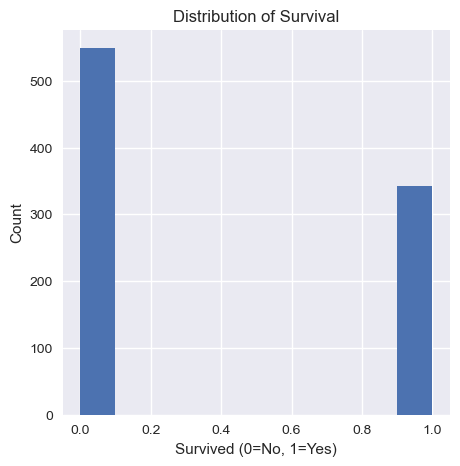

In [898]:
# Histrogram of target variable

%matplotlib inline
import matplotlib.pyplot as plt
df_titanic_target.hist(figsize=(5, 5))
plt.title('Distribution of Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

#### Histograms to get an overview of the distribution of feature values

- The hist() function provided will only generate histograms
- for numeric values.
- The only numeric features in the Titanic dataset are:
- Age, Fare, Pclass, Parch, and SibSp

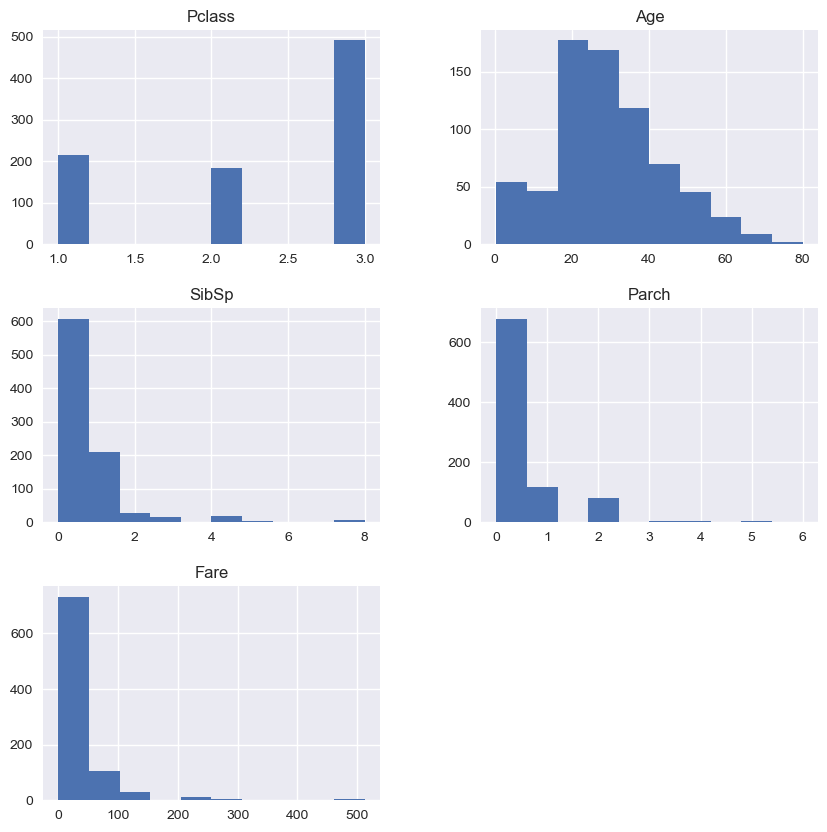

In [901]:
# Histogram of features

df_titanic_features.hist(figsize=(10,10))
plt.show()

#### Creating a histogram of a single numeric attribute and specify the number of equal-width bins along the x-axis.

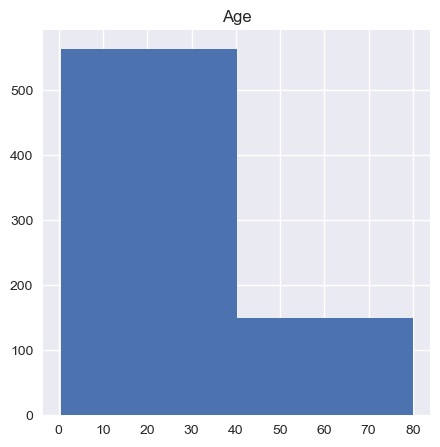

In [904]:
# histogram of single feature - Age

# it is a good idea to try different bin widths to get 
# better idea of the distribution of values.

df_titanic_features.hist(column='Age', figsize=(5,5), bins=2)
plt.show()

- Since the value_counts() function works on both numeric and categorical features, you could generate a histogram of a categorical feature by using the output of the value_counts() function.
- The snippet below demonstrates this approach on the Embarked categorical feature.

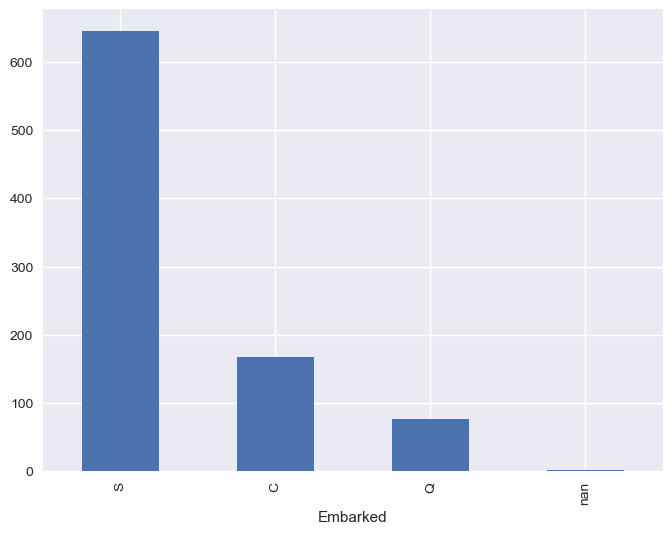

In [907]:
# Histogram of categorical attribute 'Embarked'
# Computed from the output of the value_counts() function
# includes NAN markers
import matplotlib.pyplot as plt
%matplotlib inline


vc = df_titanic_features['Embarked'].value_counts(dropna=False)
vc.plot(kind='bar', figsize=(8, 6)) # Add figure size for better visibility

# Show the plot
plt.show()

- The statistical characteristics of these variables and the correlation between them can provide useful insights into the training data.
- Pandas provides a describe() function that can be used on dataframes to obtain statistical information on the numerical attributes within the dataframe.

In [910]:
# Get statistical characteristics of the data

df_titanic_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


- Information on quartiles and statistical characteristics of a feature is often represented using a box plot.
- You can use the boxplot() function of the dataframe to create a box plot of all numeric features.

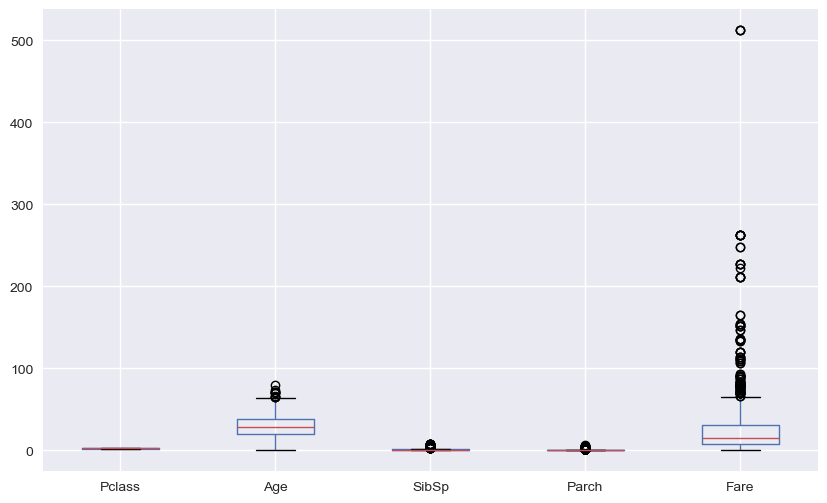

In [913]:
# Create a box plot of numeric features
df_titanic_features.boxplot(figsize=(10, 6))
plt.show()

- Information on the correlation between input features and the target can be helpful in picking out the best fatures to use for model building and predictions.
- Information on correlation between features themselves can be helpful in reducing the number of features and the general risk of overfitting.
- Pandas provides a corr() function that can be used to compute Pearson's correlation coefficient between columns of a dataframe.

In [920]:

# Correlation between the target variable and the features

df_titanic.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [922]:
# Select only numerical columns for correlation
# Exclude string/object columns that can't be used in correlation
numerical_columns = df_titanic.select_dtypes(include=['float64', 'int64']).columns
correlation = df_titanic[numerical_columns].corr()

# Display the correlation matrix
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Visualizing Correlations

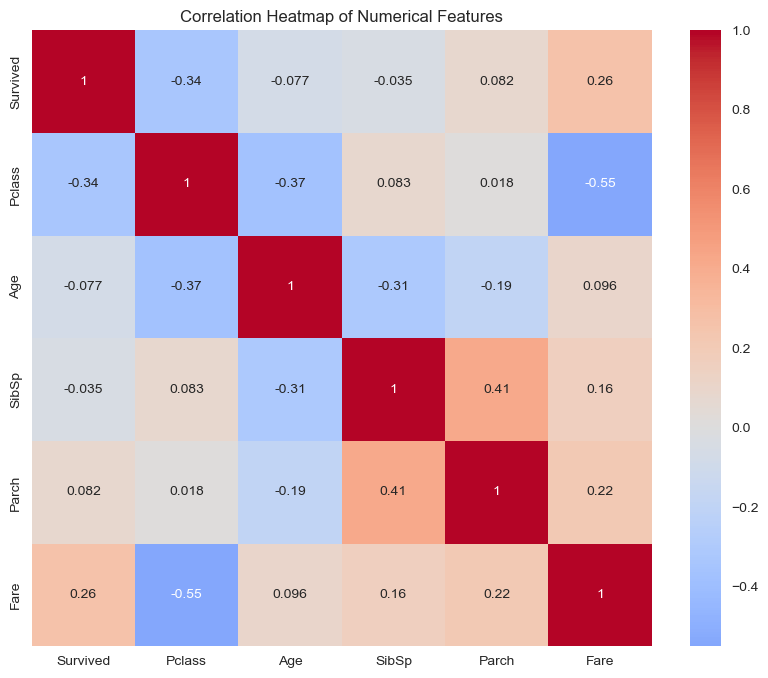

In [925]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- The darker the color, the stronger the correlation (positive or negative).
- Pearson's correlation coefficient will only detect linear correlation between variables.

In [934]:
# What features show the strongest correlation with the target variable?

# Select only numerical columns for correlation analysis
numerical_columns = df_titanic.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_titanic[numerical_columns].corr()

# Sort correlations with 'Survived' in descending order
corr_matrix['Survived'].sort_values(ascending=False)

# Alternative approach if you want to see column names:
# print("\nNumerical columns used:", numerical_columns.tolist())

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

### Another way to get information on the correlation between features
#### Scatter plots
    - Create between pairs of features to visualize their relationship

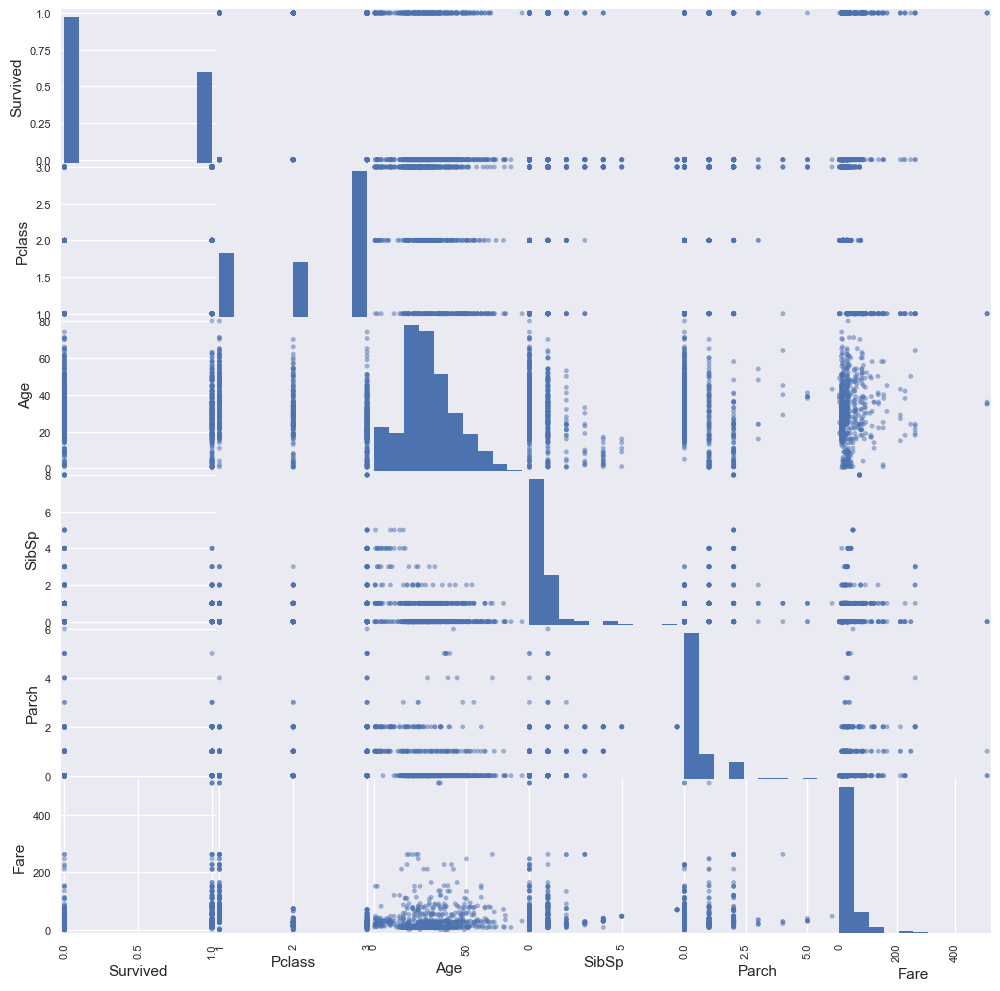

In [937]:
# Visualize relationship between features using
# a matrix of scatter plots.

from pandas.plotting import scatter_matrix
scatter_matrix(df_titanic, figsize=(12,12))
plt.show()

## Handling Missing Values

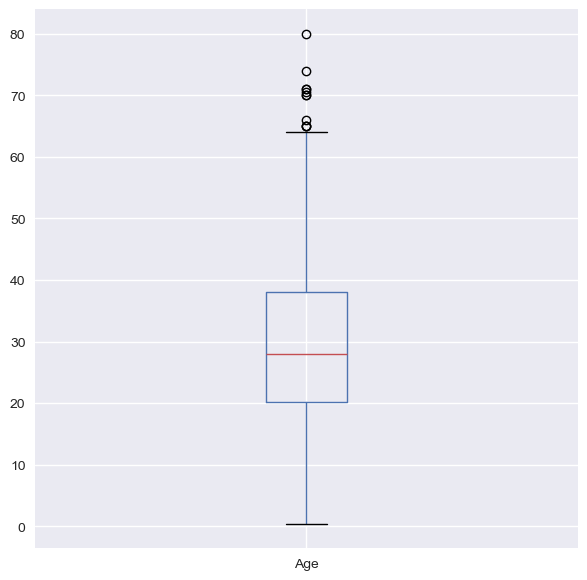

In [939]:
# Box plot of the Age feature Variable

%matplotlib inline

import matplotlib.pyplot as plt
df_titanic_features.boxplot(column='Age', figsize=(7,7))
plt.show()

- Pandas provides the fillna() function used to replace missing values with the a new value.

In [943]:
# fill missing values with the median

median_age = df_titanic_features['Age'].median()

print(median_age)

28.0


In [945]:
df_titanic_features.fillna({'Age':median_age}, inplace=True)

In [947]:
df_titanic_features['Age'].isnull().sum()

0

## NB
- Ensure that any feature engineering or imputation that is carried out on the training data is also carried out on the test data.

- Embarked attribute is categorical, and since the numbr of missing values is small(just 2) a reasoable approach is to substitute the missing values with the most frequent occurring value in th embarked column.

In [951]:
# fill missing values of the embarked column
# with the most value in the column

embarked_value_counts = df_titanic_features['Embarked'].value_counts(dropna=True)

most_common_value = embarked_value_counts.index[0]
print(most_common_value)

S


In [953]:
df_titanic_features.fillna({'Embarked': most_common_value}, inplace=True)

In [955]:
df_titanic_features['Embarked'].isnull().sum()

0

- The cabin attribute is categorical with 687 missing values.
- The best approach to handle this missing values in the column is to create a new boolean feature CabinIsKnown, which will have a value True if the cabin attribute is known, and False otherwise.
- Use integer 1 to signify know cabin values and 0 to sigify missing cabin values.
- Hence, you will create an unintentional order in the data (1 being greater than 0) and this could influence the output of some models.


#### Creating a new column, called CabinIsKnown and dropping the original Cabin Column from the dataframe

In [958]:
df_titanic_features.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [960]:
# create a boolean feature 'CabinIsKnown'
# which will have True if the Cabi column
# Does not have missing data

df_titanic_features['CabinIsKnown'] = ~df_titanic_features.Cabin.isnull()

# drop the Cabin column from the dataframe


df_titanic_features.drop(['Cabin'], axis=1, inplace=True)


In [962]:
df_titanic_features.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'CabinIsKnown'],
      dtype='object')

In [964]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [966]:
# Displaying the columns of the dataframe

print(df_titanic_features.columns.values)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked'
 'CabinIsKnown']


In [968]:
# Displaying number of missing values in the columns

df_titanic_features.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinIsKnown    0
dtype: int64

In [970]:
## df_titanic_features.to_excel('df_titanic_features.xlsx', index=False)

In [972]:
## df_titanic_target.to_csv('df_titanic_target.csv', index=False)

## Creating New Features

- SibSp is a numeric variable that indicates the number of siblings/spouses traveling together.
- Parch is a numeric variable that indicates th number of parents and children traveling together.
- It makes sense to combine these values into a single numeric value that represent the size of the family travelling together.

In [976]:
## Create a numeric feature called FamilySize 
# that is the sum of the SibSp and Parch features.

df_titanic_features['FamilySize'] = df_titanic_features.SibSp + df_titanic_features.Parch

In [978]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0


- Age and fare features are numeric and take on a range of values.
- It may be useful to bin the values of these features and create categorical features.
- During model building, categorical (binned) values of Age and Fare provide better results.

In [981]:
# generate a new categorical feature AgeCategory
bins_age = [0,20,30,40,50,150]
labels_age = ['<20','20-30','30-40','40-50','>50']

df_titanic_features['AgeCategory'] =pd.cut(df_titanic_features.Age,
                                          bins = bins_age,
                                          labels = labels_age,
                                          include_lowest = True)

In [983]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40


- The cut() function has several parameters.
- The bins parameter contains a sequence of numbers that define the edges of the bins.
- The lowest and highest values are deliberately chosen to be outside the range of values observed in the Age feature.
- The labels parameter contains a list of strings that serve as the labels of the bins(and values of the categorical feature that will be gnerated as a result of executing the cut() function).
- The include_lowest parameter is set to True to indicate the first interval is left_inclusive.

### Splitting a continuous numeric variable into a categorical variable by using the quantiles as bin boundaries
- Use the qcut() function

In [987]:
# generate a new categorical feature FareCategory

df_titanic_features['FareCategory'] = pd.qcut(df_titanic_features.Fare,
                                             q=4, # using the quartiles as bin boundaries
                                             labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [989]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory,FareCategory
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30,Q1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40,Q4
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30,Q2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40,Q4
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40,Q2


## Transforming Numeric Features

- When building a model with continuous numeric variables, you may need to transform numeric attributes.
- Normalization and standardization are the commonest types of transformations performed on numeric attributes.
- The result of normalizing a feature is that the values of the features will be scaled to 0 and 1.
- The result of standardizing a feature is that the distribution of new values will have a mean of 0 and a standard deviation of 1, but the range of the standardized values is not guaranteed to be between 0 and 1.
- Stadardization is used when the model you want to build assumes the feature variables have a Gaussian distribution.
- Normalization is used with neural network models, which require input to lie within the range [0, 1].
- Scikit-learn provides a number of classes to assist in scalling numeric attributes.
- The MinMaxScaler class is commonly used for normalizing features.
- The StandardScaler class is commonly used for standardization.

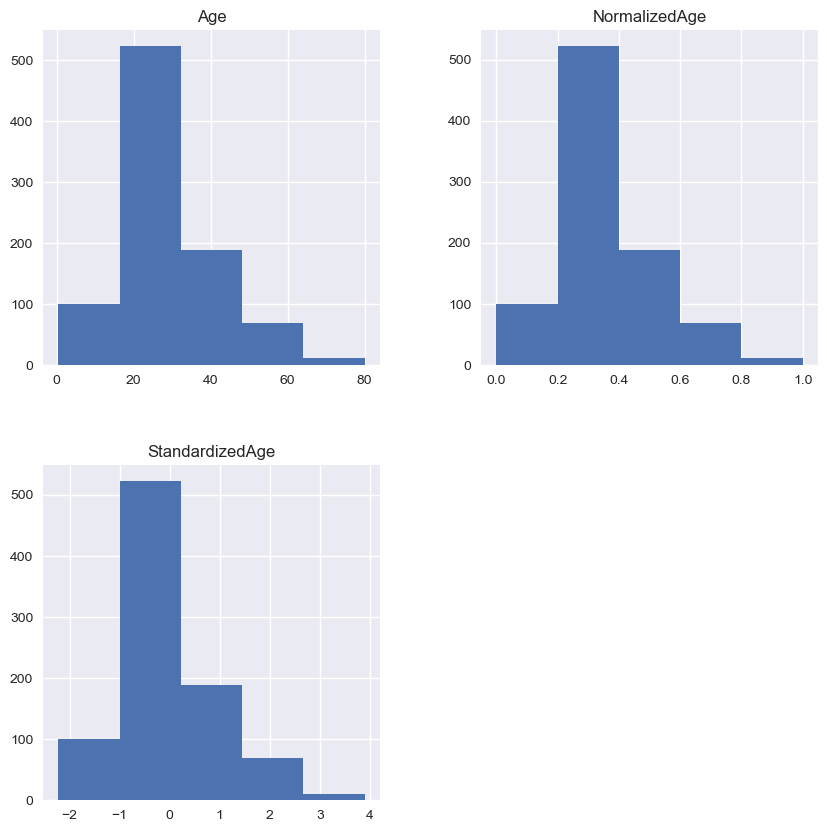

In [993]:
# generate new feature NormalizedAge using MinMaxScaler

from sklearn import preprocessing

minmax_scaler =  preprocessing.MinMaxScaler()

ndNormalizedAge = minmax_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['NormalizedAge'] = pd.DataFrame(ndNormalizedAge)


# generate new feature StandardizedAge using StandardScaler

standard_scaler = preprocessing.StandardScaler()

ndStandardizedAge = standard_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['StandardizedAge'] = pd.DataFrame(ndStandardizedAge)

# histogram of Age, NormalizedAge, StandardizedAge
df_titanic_features[['Age', 'NormalizedAge', 'StandardizedAge']].hist(figsize=(10, 10),
                                                                     bins=5)
plt.show()

## One Hot Encoding Categorical Features

- Teachnique that converts a categorical feature into a number of binary numeric features, one per category.
- For instance, linear regression and logistic regression are only capable of using numeric features.
- Algorithms like XGBoost and random forests are capable of using categorical features without any problems.
- Pandas provides the get_dummies function to help with one-hot encoding.

In [996]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory,FareCategory,NormalizedAge,StandardizedAge
PassengerId,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30,Q1,0.472229,0.663861
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40,Q4,0.321438,-0.258337
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30,Q2,0.434531,0.433312
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40,Q4,0.434531,0.433312
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40,Q2,0.346569,-0.104637


In [998]:
# use one-hot encoding to convert categorical atributes
# into binary numeric attributes

df_titanic_features = pd.get_dummies(df_titanic_features,
                                    columns=['Sex', 'Embarked', 'CabinIsKnown', 'AgeCategory', 'FareCategory'])

# display the columns of the dataframe
print(df_titanic_features.columns.values)

['Pclass' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'FamilySize'
 'NormalizedAge' 'StandardizedAge' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'CabinIsKnown_False' 'CabinIsKnown_True'
 'AgeCategory_<20' 'AgeCategory_20-30' 'AgeCategory_30-40'
 'AgeCategory_40-50' 'AgeCategory_>50' 'FareCategory_Q1' 'FareCategory_Q2'
 'FareCategory_Q3' 'FareCategory_Q4']


- Pandas has created additional columns, consider the Sex categorical attribute.
- This attibute has two values: male and female.
- To convert this categorical attribute intoa binary numeric attribute, Pandas creates two new columns in the dataframe called Sex_male and Sex_female.
- Other categorical attributes such as Embarked, CabinIsKnown have been processed the same.

In [1001]:
df_titanic_features[['Sex_male', 'Sex_female']].head()

,Sex_male,Sex_female
PassengerId,,
1,True,False
2,False,True
3,False,True
4,False,True
5,True,False


- Strong negative correlation between Sex_male and Sex_female.

In [1004]:
# Strong negative correlation between Sex_male and Sex_female
# one of these can be dropped.

corr_matrix = df_titanic_features[['Sex_male', 'Sex_female']].corr()
print(corr_matrix)

            Sex_male  Sex_female
Sex_male         1.0        -1.0
Sex_female      -1.0         1.0


- The situation is similar with the CabinIsKnown_False and CabinIsKnown_True features

In [1007]:
# drop the Name, Ticket, Sex_female, CabinIsKnown_False features
# To get a dataframe that can be used for linear and logistic regression

df_titanic_features_numeric = df_titanic_features.drop(['Name', 'Ticket', 'Sex_female', 'CabinIsKnown_False'], axis=1)

In [1009]:
df_titanic_features_numeric.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,NormalizedAge,StandardizedAge,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinIsKnown_True,AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,1,0.472229,0.663861,True,False,False,True,False,False,True,False,False,False,True,False,False,False
2,1,38.0,1,0,71.2833,1,0.321438,-0.258337,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,3,26.0,0,0,7.9250,0,0.434531,0.433312,False,False,False,True,False,False,True,False,False,False,False,True,False,False
4,1,35.0,1,0,53.1000,1,0.434531,0.433312,False,False,False,True,True,False,False,True,False,False,False,False,False,True
5,3,35.0,0,0,8.0500,0,0.346569,-0.104637,True,False,False,True,False,False,False,True,False,False,False,True,False,False


### Correlation between the target attribute Survived and these numeric features

In [1012]:
# what features show the strongest correlation with the target variable

corr_matrix2 = df_titanic_features.corr()
corr_matrix2['Survived'].sort_values(ascending=False)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [1016]:
# What features show the strongest correlation with the target variable?

# Select only numerical columns for correlation analysis
numerical_columns = df_titanic_features_numeric.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_titanic_features_numeric[numerical_columns].corr()

# Sort correlations with 'Survived' in descending order
corr_matrix.df_titanic_target.sort_values(ascending=False)

# Alternative approach if you want to see column names:
# print("\nNumerical columns used:", numerical_columns.tolist())

AttributeError: 'DataFrame' object has no attribute 'df_titanic_target'